# Linear Regression Scikit Learn

In [40]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
# Features que voy a coger

features_cols = ['TV','Radio','Newspaper']

In [11]:
# Separa X e y

X = data[features_cols]
y = data['Sales']
print(X.shape,len(y))

(200, 3) 200


In [16]:
# Selector Recursive Feature Elimination
#  Con 2 variables predictivas (features)
#  Con step = 1 en un paso
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X,y)

In [17]:
selector.support_

array([ True,  True, False])

In [18]:
selector.ranking_

array([1, 1, 2])

___Esto nos indica que si nos tenemos que quedar con dos features serían el primero y el segundo y rechazar el tercero___

In [29]:
###########################################################################

In [30]:
# Ejemplo Libreria Scikit Learn

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
selector.support_ 


selector.ranking_


array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

In [31]:
###########################################################################

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
# Hemos recahzado Newspaper

new_features_cols = ['TV','Radio']
new_X = data[new_features_cols]
y = data['Sales']
linreg = LinearRegression()
linreg.fit(new_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
linreg.coef_

array([0.04575482, 0.18799423])

In [36]:
linreg.intercept_

2.921099912405138

In [37]:
linreg.score(new_X,y)

0.8971942610828956

In [38]:
y_test = linreg.predict(new_X)

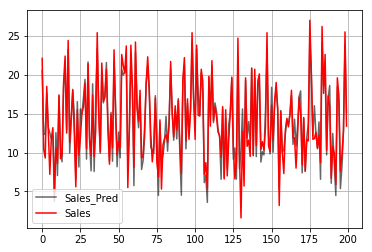

In [54]:
plt.plot(y_test,label='Sales_Pred',c='black',alpha=0.6)
plt.plot(y,c='red')
plt.legend()
plt.grid(True);